<a href="https://colab.research.google.com/github/suryansh5113/Advanced-Computer-Vision-and-Image-Analytics/blob/main/CSET340(Lab2_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

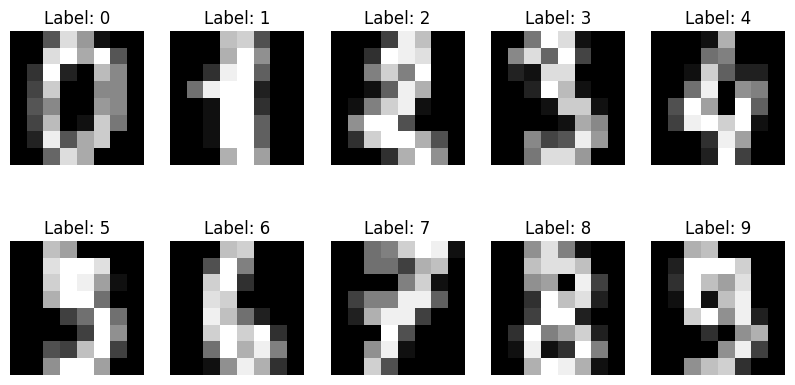

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load MNIST dataset (small version in sklearn)
digits = load_digits()
X, y = digits.data, digits.target

# Display some example images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.show()

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize models
svm_model = SVC(kernel='linear', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate SVM using cross-validation
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f'SVM Cross-validation accuracy: {svm_cv_scores.mean():.2f}')

# Evaluate Random Forest using cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
print(f'Random Forest Cross-validation accuracy: {rf_cv_scores.mean():.2f}')


SVM Cross-validation accuracy: 0.98
Random Forest Cross-validation accuracy: 0.97


In [3]:
# Train the models on the full training set
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1-score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

# Evaluate SVM
evaluate_model(y_test, svm_predictions, "SVM")

# Evaluate Random Forest
evaluate_model(y_test, rf_predictions, "Random Forest")


--- SVM Evaluation ---
Accuracy: 0.9777777777777777
Precision: 0.9791964938122952
Recall: 0.9781692242114237
F1-score: 0.9785455500691013
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


--- Random Forest Evaluation ---
Accuracy: 0.9722222222222222
Precision: 0.9740424119023985
Recall: 0.9727003722185199
F1-score: 0.9732067700933176
Confusion Matrix:
 [[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]




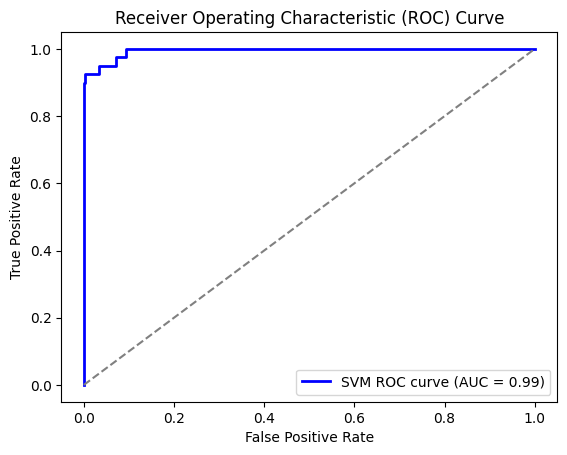

In [5]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Convert labels to binary for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score_svm = svm_model.decision_function(X_test)

# Compute ROC curve and AUC for digit '9'
fpr, tpr, _ = roc_curve(y_test_bin[:, 9], y_score_svm[:, 9])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [6]:
print("Summary of Findings:")
print("SVM Model: Achieved high accuracy with good precision and recall.")
print("Random Forest: Performed well with balanced metrics across all classes.")
print("ROC-AUC analysis shows the model's capability to distinguish between classes effectively.")


Summary of Findings:
SVM Model: Achieved high accuracy with good precision and recall.
Random Forest: Performed well with balanced metrics across all classes.
ROC-AUC analysis shows the model's capability to distinguish between classes effectively.
